# ศรัณย์ สมภพโภคาเศรษฐ์ 6210422061

**Step 0 - install and import dependencies**

In [ ]:
# !pip install pythainlp
# !pip install tensorflow_text
# !pip install umap-learn

In [7]:
import numpy as np
import pandas as pd
import re

import tensorflow as tf
import tensorflow_hub as hub

!pip install tensorflow_text
import tensorflow_text
!pip install umap
import umap

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

!pip install pythainlp
import pythainlp
from pythainlp.corpus.common import thai_words
from pythainlp.util import Trie
import collections


     |████████████████████████████████| 11.0 MB 3.7 MB/s 
     |████████████████████████████████| 743 kB 58.2 MB/s 


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3' #'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3' for a large model

model = hub.load(module_url)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Coding/Voice/Voice of Customers/Wongnai Reviews - Small.csv")

In [ ]:
print(df.shape)
df.head()

(300, 3)


,Review ID,Review,KMeans ID
0,1,เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีวันนึงเด...,1
1,2,Art of Coffee Kasetsart เป็นร้านกาแฟรสชาติเยี่...,1
2,3,กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่ค...,2
3,4,วันนี้มีโอกาสตื่นเช้าครับเลยถึงโอกาสออกมาหาอะไ...,3
4,5,ชอบมาทานร้านนี้ถ้าอยากกินอาหารเวียดนามใกล้บ้าน...,3


In [ ]:
review = df['Review'].tolist()
for ind in range(len(review)):
  print(f'review {ind}')
  print('-----------')
  print(review[ind])

review 0
-----------
เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีวันนึงเดินเข้าไปสั่ง ความคิดแรกที่เห็นปริมาณของกาแฟร้อนก็เฟลแล้ว มีอยู่ครึ่งแก้วน้อยๆได้ พอตอนดื่มยิ่งเฟลหนักกว่าเดิม หาความเป็น Macchiato ไม่เจอเลย หลังจากนี้ลาขาด กินกาแฟโบราณแก้วละ 20 บาทยังมีความสุขมากกว่าอีก
review 1
-----------
Art of Coffee Kasetsart เป็นร้านกาแฟรสชาติเยี่ยม ราคาไม่แพง บรรยากาศนั่งสบาย 

พนักงานที่ร้านน่ารักมาก อัธยาศัยดี พูดจากับลูกค้าเพราะมาก ทำให้อยากไปอุดหนุนบ่อยๆ ^^

เมนูที่ต้องสั่ง 

-เอ๊กซ์เพรสโซ่ไอซ์ ลาเต้ไอซ คาราเมล มัคคิอาโต้

-ชาอัสสัมชาซีลอน

-อิตาเลียนโซดา
review 2
-----------
กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่คาวเลยเนื้อกุ้งก็ทั้งหอมและมัน น้ำจ้ิมก็อร่อยเจ้มจ้นมีอาหารอร่อยหลากหลายรายการ ออส่วนมาในกระทะร้อนฉ่า เสริ์ฟทีมีแต่คนหันมามองเพราะเสียงดังมากกกกก เรียกความสนใจได้ดี แต่อร่อยนะแนะนำเลย ปลาหมึกไข่เค็มเมนูนี้แคเลทเตอรอลอาจจะสูงไปสักหน่อยแต่ห้ามพลาดเด็ดขาดเลยค่ะเพราะอร่อยมากยากบรรยาย ยิ่งทานตอนร้อนๆๆนะ 
ฮื้อ ขออีกจาน กุ้งอบวุ้นเส้นรสชาติดีก็อร่อยใช้ได้แต่มันมากๆ หมูสามชั้นก้นกระ

**Step 1 - document embedding and dimension reduction**

In [ ]:
#embed sentences using Universal Sentence Encoder (USE)

embed_comments_array = model(df['Review'].values).numpy()
embed_comments_array

array([[ 0.08993827,  0.01941084,  0.03787038, ..., -0.03488849,
         0.06299512,  0.04635989],
       [ 0.00634244,  0.00814594,  0.03071941, ..., -0.01478723,
        -0.03080936, -0.03316405],
       [ 0.0633687 , -0.02027139, -0.05077003, ..., -0.06530775,
        -0.00952999, -0.03439987],
       ...,
       [ 0.08775924,  0.03609736,  0.01263062, ..., -0.03102781,
        -0.03361677,  0.01928871],
       [ 0.05691195,  0.05381691, -0.0399575 , ..., -0.06598807,
        -0.05390478, -0.01037725],
       [ 0.0777048 ,  0.05080631,  0.02680681, ..., -0.0061413 ,
        -0.01313567,  0.02236264]], dtype=float32)

In [ ]:
#reduce array dimensions using umap (you can chagne n_components)

reducer = umap.UMAP(random_state=42,n_components=50)
umap_embed_comments_array = reducer.fit_transform(embed_comments_array)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


**Step 2 - document clustering using KMeans**

Text(0, 0.5, 'WCSS')

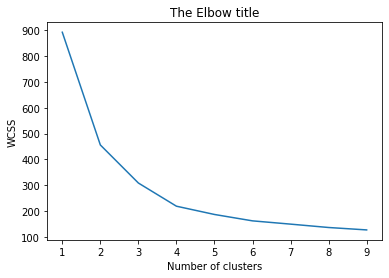

In [ ]:
#run kmeans with various number of k. evaluate no. of k based on the elbow plot

wcss=[]
max_k = 10
for i in range(1, max_k):
  kmeans = KMeans(i)
  kmeans.fit(umap_embed_comments_array)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1, max_k)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
#run kmeans with no. of clusters you see fit the most

k = 4

kmeans = KMeans(n_clusters = k)
kmeans.fit(umap_embed_comments_array)

df['KMeans ID'] = kmeans.labels_

In [ ]:
# number of user in each cluster
df['KMeans ID'].value_counts()

1    100
3     83
2     69
0     48
Name: KMeans ID, dtype: int64

In [ ]:
#merge all reviews of each cluster into one big sentence 

df_kmeans = pd.DataFrame(columns=["KMeans ID", "texts"])


for i in range(0, k):
  row = []
  row.append(i)
  row.append(df['Review'][df['KMeans ID'] == i].to_string())
  df_kmeans.loc[len(df_kmeans)] = row

In [ ]:
df_kmeans

,KMeans ID,texts
0,0,13 เคยเป็นไหมกันไหมคะ หลังอาหารมื้อใหญ่ ต่...
1,1,0 เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีว...
2,2,2 กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูห...
3,3,3 วันนี้มีโอกาสตื่นเช้าครับเลยถึงโอกาสออก...


In [ ]:
#create regex compiler for removal of a character you don't want

special_characters = "/[!@#$%^&*']/g"

specialchar_pattern = re.compile(special_characters)

In [ ]:
#create regex compiler for removal of any emoji

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [ ]:
#create regex compiler for removal of digit

number_pattern = re.compile("[0-9]")

In [ ]:
#create regex compiler for removal of white space

space_pattern = re.compile("\s+")

In [ ]:
#create regex compiler for removal of .

dot_pattern = re.compile(r"\.+")

In [ ]:
#create regex compiler for removal of \

backslash_pattern = re.compile(r"\\+")

In [ ]:
#define a function to tokenize a sentence into words - you can define words you want to remove as well as new words for tokenization

stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = ['u', 'b', 'n', 'nn', 'nn-', '\n', 'ร้าน']
screening_words = stopwords + removed_words

new_words = {"สตารบัก"}

words = new_words.union(thai_words())

custom_dictionary_trie = Trie(words)

def tokenize_to_list(sentence):
  merged = []
  words = pythainlp.word_tokenize(str(sentence), engine='newmm', custom_dict=custom_dictionary_trie)
  for word in words:
    if word not in screening_words:
      merged.append(word)
  return merged

In [ ]:
#clean and tokenize sentences. count the occurences of each word

df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: emoji_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: specialchar_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: number_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: space_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: dot_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: backslash_pattern.sub(r'', x))
df_kmeans['texts_tokenized'] = df_kmeans['texts'].apply(lambda x: tokenize_to_list(x))
df_kmeans['texts_count'] = df_kmeans['texts_tokenized'].apply(lambda x: collections.Counter(x).most_common())

In [ ]:
#results of tokenization

df_kmeans

,KMeans ID,texts,texts_tokenized,texts_count
0,0,เคยเป็นไหมกันไหมคะหลังอาหารมื้อใหญ่ต่อให้อิ่เช...,"[ไหม, ไหม, หลังอาหาร, มื้อ, ต่อให้, อิ่, เช้า,...","[(ชา, 18), (นม, 14), (ไข่มุก, 14), (ทาน, 6), (..."
1,1,เป็นคนที่ชอบทานMacchiatoเป็นประจำมีวันนึงเดArt...,"[คน, ชอบ, ทาน, Macchiato, เป็นประจำ, นึง, เด, ...","[(ร้านกาแฟ, 22), (กาแฟ, 19), (ทาน, 11), (ชอบ, ..."
2,2,กวงทะเลเผาอาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่คส...,"[กวง, ทะเล, เผา, อาหารทะเล, เค้า, สด, เนื้อ, ป...","[(ร้านอาหาร, 11), (กก, 7), (กิน, 7), (อร่อย, 6..."
3,3,วันนี้มีโอกาสตื่นเช้าครับเลยถึงโอกาสออกมาหาอะไ...,"[มีโอกาส, ตื่น, เช้า, โอกาส, มาหา, อะ, ไช, อบ,...","[(กิน, 10), (อร่อย, 9), (ทาน, 7), (ผม, 7), (รี..."


In [ ]:
type(df_kmeans['texts_count'][0][0])

def Convert(tup, di):
    di = dict(tup)
    return di
      
tups = [("akash", 10), ("gaurav", 12), ("anand", 14), 
    ("suraj", 20), ("akhil", 25), ("ashish", 30)]
dictionary = {}
print (Convert(tups, dictionary))

tuple

In [ ]:
#show top keywords of each cluster

top_N_words = 10

for i in range(0, len(df_kmeans)):
  print(f"Cluster ID : {i}\n")
  print(f"Most common words include : {list(df_kmeans['texts_count'][i])[:top_N_words]}\n")

#tune a model by remove unwanted characters and words and add more words to a custom dictionary

Cluster ID : 0

Most common words include : [('กิน', 10), ('อร่อย', 9), ('ทาน', 7), ('ผม', 7), ('รีวิว', 7), ('บ้าน', 5), ('ร้านกาแฟ', 5), ('กาแฟ', 5), ('กก', 5), ('อาหาร', 4)]

Cluster ID : 1

Most common words include : [('ร้านอาหาร', 11), ('กก', 7), ('กิน', 7), ('อร่อย', 6), ('ซอย', 6), ('อาหาร', 6), ('ทาน', 5), ('ราคา', 5), ('สวัสดี', 4), ('เพื่อน', 4)]

Cluster ID : 2

Most common words include : [('ชา', 18), ('นม', 14), ('ไข่มุก', 14), ('ทาน', 6), ('เครื่องดื่ม', 4), ('ร้า', 3), ('ตั้งอยู่', 3), ('รีวิว', 3), ('ลอง', 3), ('เดิน', 3)]

Cluster ID : 3

Most common words include : [('ร้านกาแฟ', 22), ('กาแฟ', 19), ('ทาน', 11), ('ชอบ', 8), ('คาเฟ่', 6), ('กิน', 6), ('แวะ', 6), ('น่ารัก', 5), ('น', 5), ('นั่ง', 5)]



In [ ]:
# ลบคำที่มีเหมือนกันในทุก cluster ออก
df_kmeans['set_word'] = df_kmeans['texts_tokenized'].apply(set)
intersect_word = df_kmeans['set_word'][0] & df_kmeans['set_word'][1] & df_kmeans['set_word'][2] & df_kmeans['set_word'][3]
print(intersect_word)
list_intersect_word = list(intersect_word)

def remove_intersect_word(_lists, _words):
  return_list = list()
  for _list in _lists:
    temp = list()
    for _li in _list:
      if _li not in _words:
        temp.append(_li)
    return_list.append(temp)
  return return_list

df_kmeans['trim'] = remove_intersect_word(df_kmeans['texts_tokenized'], list_intersect_word)
df_kmeans['texts_count_trim'] = df_kmeans['trim'].apply(lambda x: collections.Counter(x).most_common())
df_kmeans

{'ผม', 'เดิน', 'นั่ง', 'นึก', 'รีวิว', 'ลอง', 'เมนู', 'อร่อย', 'แวะ', 'สาขา', 'กา', 'กาแฟ', 'สไตล์', 'กิน', 'ท', 'หลากหลาย', 'คน', 'ทาน', 'ขาย', 'อาหาร', 'ร้า', 'ดี'}


,KMeans ID,texts,texts_tokenized,texts_count,set_word,trim,texts_count_trim
0,0,เคยเป็นไหมกันไหมคะหลังอาหารมื้อใหญ่ต่อให้อิ่เช...,"[ไหม, ไหม, หลังอาหาร, มื้อ, ต่อให้, อิ่, เช้า,...","[(ชา, 18), (นม, 14), (ไข่มุก, 14), (ทาน, 6), (...","{ม, อ้วน, เข, ขายของ, ต้น, จั, ไออุ่น, ห้, nTh...","[ไหม, ไหม, หลังอาหาร, มื้อ, ต่อให้, อิ่, เช้า,...","[(ชา, 18), (นม, 14), (ไข่มุก, 14), (เครื่องดื่..."
1,1,เป็นคนที่ชอบทานMacchiatoเป็นประจำมีวันนึงเดArt...,"[คน, ชอบ, ทาน, Macchiato, เป็นประจำ, นึง, เด, ...","[(ร้านกาแฟ, 22), (กาแฟ, 19), (ทาน, 11), (ชอบ, ...","{ศิลปิน, ดิ, ส่วนตัว, สวัสดี, น้, วี, สี, moch...","[ชอบ, Macchiato, เป็นประจำ, นึง, เด, ArtofCoff...","[(ร้านกาแฟ, 22), (ชอบ, 8), (คาเฟ่, 6), (น่ารัก..."
2,2,กวงทะเลเผาอาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่คส...,"[กวง, ทะเล, เผา, อาหารทะเล, เค้า, สด, เนื้อ, ป...","[(ร้านอาหาร, 11), (กก, 7), (กิน, 7), (อร่อย, 6...","{เฉ, สวัสดี, ยอดฮิต, สี, โอ้, รา, เมนู, เคลม, ...","[กวง, ทะเล, เผา, อาหารทะเล, เค้า, สด, เนื้อ, ป...","[(ร้านอาหาร, 11), (กก, 7), (ซอย, 6), (ราคา, 5)..."
3,3,วันนี้มีโอกาสตื่นเช้าครับเลยถึงโอกาสออกมาหาอะไ...,"[มีโอกาส, ตื่น, เช้า, โอกาส, มาหา, อะ, ไช, อบ,...","[(กิน, 10), (อร่อย, 9), (ทาน, 7), (ผม, 7), (รี...","{พักเที่ยง, ตลก, ดิ, น้, สวัสดี, ชม, เหลือเฟือ...","[มีโอกาส, ตื่น, เช้า, โอกาส, มาหา, อะ, ไช, อบ,...","[(บ้าน, 5), (ร้านกาแฟ, 5), (กก, 5), (ชอบ, 4), ..."


In [ ]:
#show top keywords of each cluster

top_N_words = 10

for i in range(0, len(df_kmeans)):
  print(f"Cluster ID : {i}\n")
  print(f"Most common words include : {list(df_kmeans['texts_count_trim'][i])[:top_N_words]}\n")

#tune a model by remove unwanted characters and words and add more words to a custom dictionary

Cluster ID : 0

Most common words include : [('ชา', 18), ('นม', 14), ('ไข่มุก', 14), ('เครื่องดื่ม', 4), ('ตั้งอยู่', 3), ('ไต้หวัน', 3), ('ไหม', 2), ('เติม', 2), ('นขา', 2), ('ชาเขียว', 2)]

Cluster ID : 1

Most common words include : [('ร้านกาแฟ', 22), ('ชอบ', 8), ('คาเฟ่', 6), ('น่ารัก', 5), ('น', 5), ('เจอ', 5), ('นึง', 4), ('อ', 4), ('เบเกอรี่', 4), ('พาย', 4)]

Cluster ID : 2

Most common words include : [('ร้านอาหาร', 11), ('กก', 7), ('ซอย', 6), ('ราคา', 5), ('สวัสดี', 4), ('เพื่อน', 4), ('ส้มตำ', 4), ('ไทย', 4), ('แซ่บ', 4), ('รสชาติ', 4)]

Cluster ID : 3

Most common words include : [('บ้าน', 5), ('ร้านกาแฟ', 5), ('กก', 5), ('ชอบ', 4), ('ร้านอาหาร', 4), ('มีโอกาส', 3), ('ถนน', 3), ('คิว', 3), ('ศ', 3), ('ครั้งแรก', 3)]



**Step 4 - result discussion**

จากการตัดคำที่ซ้ำกันในทุก cluster ออกทำให้ได้ผลลัพท์ใหม่
- Cluster 0 : review ประเภทเครื่องดื่ม ประเภทชา และชานม
- Cluster 1 : review ร้านกาแฟที่เป็น cafe และ เบเกอรี่
- Cluster 2 : review ร้านอาหารไทย
- Cluster 3 : เป็น review ทั่วไปที่ไม่ได้เจาะจง